In [2]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import keras.datasets.cifar10
import tensorflow as tf
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

2024-04-17 23:48:56.832211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load cifar10 dataset, display sample images from each of the types

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

print(labels_map.get(1))



automobile


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_8773/326278668.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels_map.get(int(y_train[i+10])))


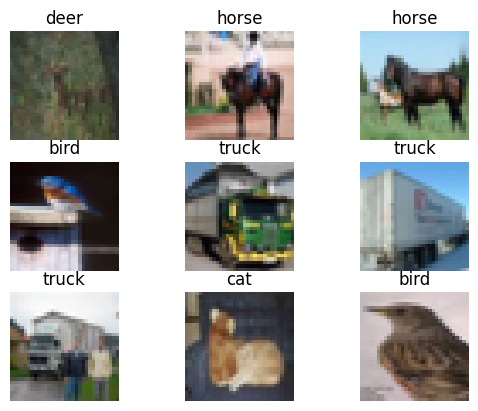

In [4]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 
 plt.title(labels_map.get(int(y_train[i+10])))
 plt.axis("off")
 # plot raw pixel data
 plt.imshow(x_train[i+10])
# show the figure
plt.show()

torch.Size([15000, 32, 32, 3])
torch.Size([15000])
torch.Size([3000, 32, 32, 3])
torch.Size([3000])


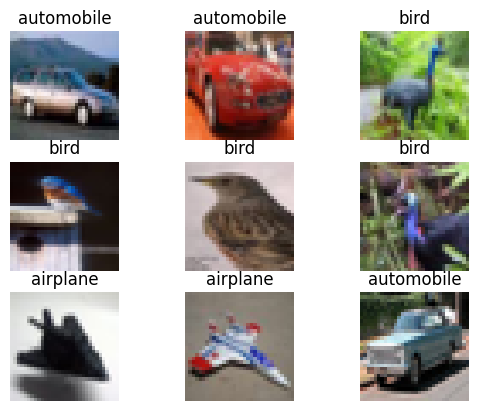

In [5]:
x_train_tensor = torch.from_numpy(x_train).float()/255
y_train_tensor = torch.from_numpy(y_train).squeeze()
x_test_tensor = torch.from_numpy(x_test).float()/255
y_test_tensor = torch.from_numpy(y_test).squeeze()


x_train_tensor = x_train_tensor[y_train_tensor < 3,:]
y_train_tensor = y_train_tensor[y_train_tensor < 3]

x_test_tensor = x_test_tensor[y_test_tensor < 3,:]
y_test_tensor = y_test_tensor[y_test_tensor < 3]

print(x_train_tensor.shape)
print(y_train_tensor.shape)
print(x_test_tensor.shape)
print(y_test_tensor.shape)

for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 
 plt.title(labels_map.get(int(y_train_tensor[i])))
 plt.axis("off")
 # plot raw pixel data
 plt.imshow(x_train_tensor[i])
# show the figure

plt.show()


In [6]:
# put data into a dataset, split testing and training

dataset = torch.utils.data.TensorDataset(x_train_tensor,y_train_tensor) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=True)

print(len(train_loader.dataset))
print(len(test_loader.dataset))
print(len(train_loader))
print(len(test_loader))


12000
3000
120
30


In [7]:
print(train_loader.dataset[2])

(tensor([[[0.2353, 0.2392, 0.2235],
         [0.1882, 0.1922, 0.1725],
         [0.2157, 0.2196, 0.2039],
         ...,
         [0.0431, 0.0471, 0.0275],
         [0.0588, 0.0627, 0.0431],
         [0.0588, 0.0627, 0.0431]],

        [[0.0745, 0.0784, 0.0667],
         [0.0706, 0.0745, 0.0588],
         [0.0902, 0.0941, 0.0745],
         ...,
         [0.0510, 0.0549, 0.0353],
         [0.0549, 0.0588, 0.0392],
         [0.0588, 0.0627, 0.0431]],

        [[0.0078, 0.0118, 0.0000],
         [0.0078, 0.0118, 0.0000],
         [0.0196, 0.0235, 0.0078],
         ...,
         [0.0549, 0.0588, 0.0392],
         [0.0588, 0.0627, 0.0431],
         [0.0588, 0.0627, 0.0431]],

        ...,

        [[0.5451, 0.6078, 0.4039],
         [0.4235, 0.4863, 0.2196],
         [0.5020, 0.5608, 0.2431],
         ...,
         [0.6157, 0.6627, 0.6275],
         [0.6118, 0.6510, 0.5922],
         [0.6039, 0.6471, 0.5098]],

        [[0.5176, 0.5608, 0.4392],
         [0.6235, 0.6588, 0.5059],
         [0

In [8]:
# Time to make the network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Input images are 32x32 pixels and have 3 channels (RGB)
        input_features = 32 * 32 * 3
        hidden_features = 512  # Number of neurons in the hidden layer
        output_features = 3   # Example: number of classes for classification

        # First fully connected layer
        self.fc1 = nn.Linear(input_features, hidden_features)
        # Second fully connected layer (output layer)
        self.fc2 = nn.Linear(hidden_features, output_features)

    def forward(self, x):
        # Flatten the image from [batch_size, 3, 32, 32] to [batch_size, 3072]
        x = x.reshape(x.size(0), -1)
        # Apply first fully connected layer and a ReLU activation
        x = F.relu(self.fc1(x))
        # Output layer
        x = F.softmax(self.fc2(x))
        return x

# Example usage
network = SimpleNN()
print(network)

# Dummy input (a batch of 5 images, each 32x32x3)
dummy_input = train_dataset[0:1][0]
print(dummy_input.shape)
output = network(dummy_input)
print(output)


SimpleNN(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=3, bias=True)
)
torch.Size([1, 32, 32, 3])
tensor([[0.3641, 0.3367, 0.2992]], grad_fn=<SoftmaxBackward0>)


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_8773/432335116.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [9]:
# make a NN with convolution layers

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Output: (32, 32, 32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Output: (32, 32, 64)
        self.pool = nn.MaxPool2d(2, 2)  # Output: (16, 16, 64)
        
        # Fully connected layers
        # After two pooling layers the image size is reduced to 8x8 (from 32x32)
        self.fc1 = nn.Linear(8 * 8 * 64, 512)
        self.fc2 = nn.Linear(512, 3)  # Assume 10 classes for classification

    def forward(self, x):
        x = x.permute(0, 3, 1, 2)  # Adjust the input dimensions
        # Apply first convolution layer followed by ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolution layer followed by ReLU and pooling
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flatten the image for the fully connected layer
        x = x.reshape(-1, 8 * 8 * 64)
        
        # Apply first fully connected layer and a ReLU activation
        x = F.relu(self.fc1(x))
        # Output layer
        x = F.softmax(self.fc2(x))
        return x

# Example usage
net = SimpleCNN()
print(net)

# Dummy input (a batch of 5 images, each 32x32x3)
dummy_input = torch.randn(5, 32, 32, 3)
output = net(dummy_input)
print(output)


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=3, bias=True)
)
tensor([[0.3179, 0.3192, 0.3629],
        [0.3266, 0.3384, 0.3350],
        [0.3411, 0.3201, 0.3388],
        [0.3385, 0.3208, 0.3407],
        [0.3235, 0.3304, 0.3461]], grad_fn=<SoftmaxBackward0>)


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_8773/4288239878.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [10]:
network = SimpleCNN()
# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 100
            
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_8773/4288239878.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


Iteration 1 Training accuracy: 0.812666654586792
Iteration 1 Testing accuracy: 0.800000011920929
Iteration 2 Training accuracy: 0.8695833086967468
Iteration 2 Testing accuracy: 0.8456666469573975
Iteration 3 Training accuracy: 0.9107499718666077
Iteration 3 Testing accuracy: 0.8633333444595337
Iteration 4 Training accuracy: 0.9403333067893982
Iteration 4 Testing accuracy: 0.8733333349227905
Iteration 5 Training accuracy: 0.9576666951179504
Iteration 5 Testing accuracy: 0.8756666779518127
Iteration 6 Training accuracy: 0.9637500047683716
Iteration 6 Testing accuracy: 0.8830000162124634
Iteration 7 Training accuracy: 0.9664166569709778
Iteration 7 Testing accuracy: 0.8849999904632568
Iteration 8 Training accuracy: 0.9679166674613953
Iteration 8 Testing accuracy: 0.8840000033378601
Iteration 9 Training accuracy: 0.968416690826416
Iteration 9 Testing accuracy: 0.8849999904632568
Iteration 10 Training accuracy: 0.968833327293396
Iteration 10 Testing accuracy: 0.8846666812896729


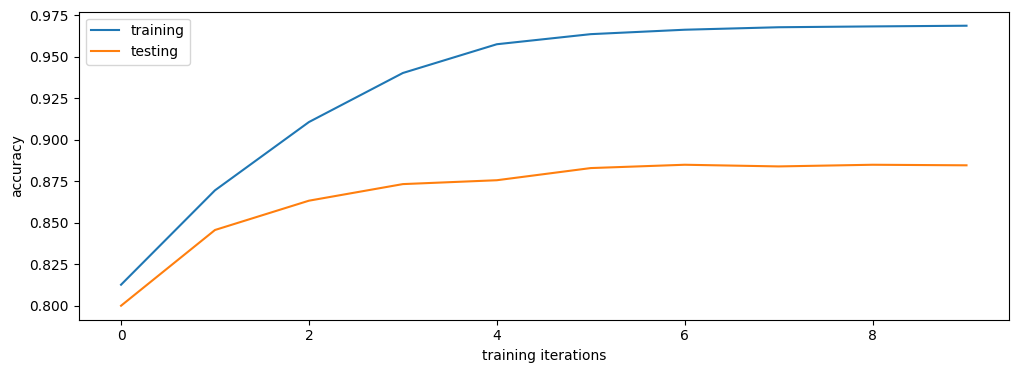

In [11]:
import matplotlib.pyplot as plt
for i in range(10):
    continue_training()


plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

In [ ]:

# Generating a saliency map for the first image in the test set
network.eval()
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
data.requires_grad_()

output = model(data)
output_idx = output.max(1, keepdim=True)[1][0].item()

output[0, output_idx].backward()
saliency, _ = torch.max(data.grad.data.abs(), dim=1)
saliency = saliency[0]  # saliency map for the first image

# Plot the results with the saliency map overlaid on the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[0].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Un-normalize and permute to display
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency.cpu().numpy(), cmap='hot')
plt.title("Saliency Map")
plt.colorbar()
plt.axis('off')
plt.show()

torch.Size([9, 32, 32, 3])
tensor([[3.5257e-15, 5.7880e-14, 1.0000e+00],
        [4.5301e-03, 9.0260e-01, 9.2867e-02],
        [1.1928e-09, 2.7493e-08, 1.0000e+00],
        [1.2737e-24, 1.0000e+00, 1.1638e-24],
        [2.7673e-02, 9.7233e-01, 4.6102e-10],
        [1.0000e+00, 2.5357e-15, 9.7737e-11],
        [1.1913e-07, 1.0000e+00, 1.3222e-13],
        [2.6008e-01, 2.5241e-10, 7.3992e-01],
        [3.7655e-17, 1.0000e+00, 2.4555e-06]], grad_fn=<SoftmaxBackward0>)
2
1
2
1
1
0
1
2
1


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_8773/4288239878.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


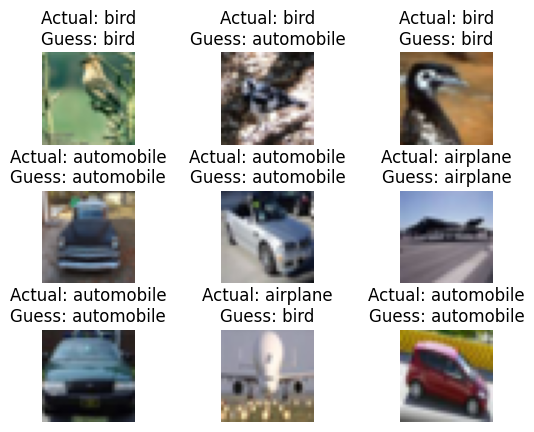

In [25]:
# test some samples and display the guesses
# Dummy input (a batch of 5 images, each 32x32x3)
dummy_input = test_dataset[20:29][0]
print(dummy_input.shape)
output = network(dummy_input)
print(output)

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)

    actual_class = labels_map.get(int(test_dataset[i+20][1]))
    print(torch.argmax(output[i]).item())
    guess = labels_map.get(torch.argmax(output[i]).item())

    plt.title("Actual: "+actual_class+"\nGuess: "+guess)

    plt.axis("off")
    # plot raw pixel data
    plt.imshow(dummy_input[i])
# show the figure

# Adjust subplots spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical spacing

plt.show()

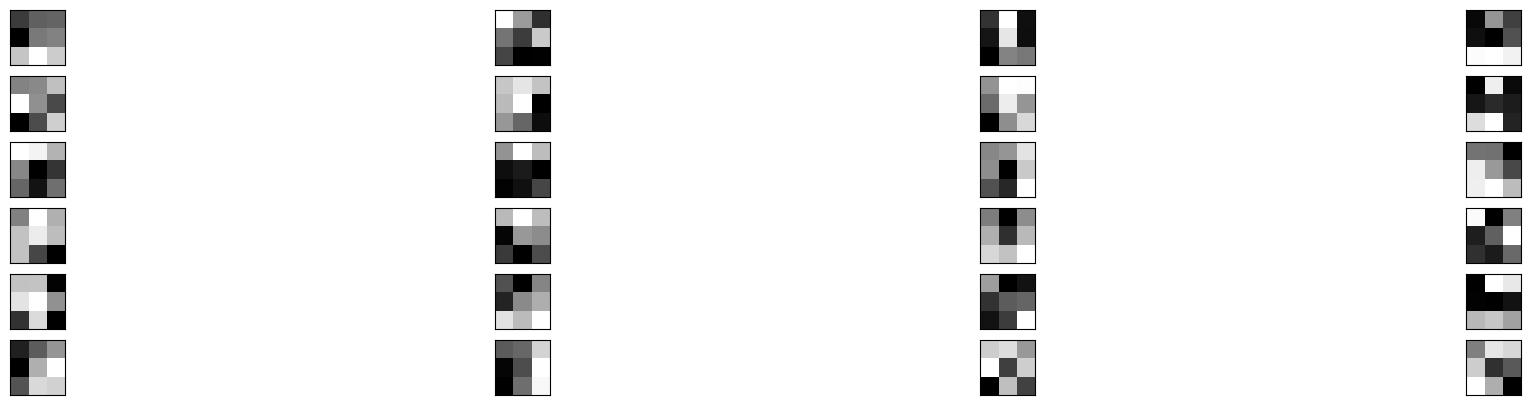

In [38]:
plt.figure(figsize=(24,5))
for i in range(24):
    plt.subplot(6, 4, i+1)
    plt.imshow(network.conv1.weight[i][2].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [1]:
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

NameError: name 'plt' is not defined

In [38]:
training_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

print(training_data.take(1))

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data.take(1)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>


2024-04-17 21:38:21.054726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


ValueError: not enough values to unpack (expected 2, got 1)

<Figure size 800x800 with 0 Axes>

/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_8773/3803672201.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


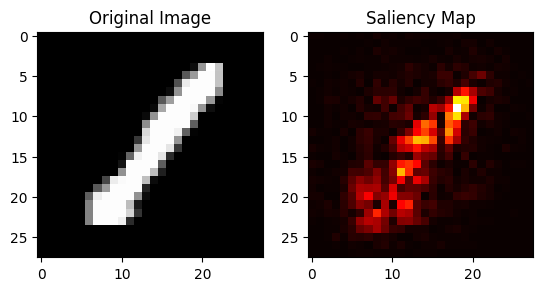

(50000, 1)
(50000, 32, 32, 3)
1
5000
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


<Figure size 640x480 with 0 Axes>

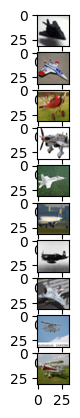

In [64]:
# split up my data based on category

indices = np.where(y_train == 0)

print(y_train.shape)
print(x_train.shape)
#binary_imgs = binary_imgs[y_train < 3,:]
indices = [y_train==0]
print(len(indices))
x_train_0 = [x_train[i] for i in range(len(x_train)) if y_train[i] == 0]


print(len(x_train_0))
print(x_train[0])


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(10,1) 

for i in range(10):
    
    axarr[i].imshow(x_train_0[i])
   
plt.show()



For this part, I need to make a network that identifies 3 categories out of the 10, for the training set I'll use:
Frog, Car, and Plane

In [46]:
print(groups[0])

[0 0 0 ... 0 0 0]


In [24]:

rand_img = trainset[10]

print(rand_img)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    

def show_sample_images(trainloader):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # show images
    imshow(torchvision.utils.make_grid(images))

#show_sample_images(trainloader)

npimg = rand_img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()



(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FBD4177BFA0>, 4)


AttributeError: 'tuple' object has no attribute 'numpy'

In [44]:
# i am going to take a step back from the cifar dataset and use something more manageable to figure out
# how this saliency map stuff works

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

# Step 1: Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=100, shuffle=True)

# Step 2: Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()




In [45]:

# create the learning rule
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    model.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 100
            
            optimizer.zero_grad()               # initialize the learning system
            output = model(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    model.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = model(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


In [46]:
for i in range(10):
    continue_training()

Iteration 1 Training accuracy: 0.09871666878461838


RuntimeError: Given groups=1, weight of size [10, 1, 5, 5], expected input[100, 32, 32, 3] to have 1 channels, but got 32 channels instead

In [ ]:

# Load a sample image from MNIST
image, label = next(iter(train_loader))
image.requires_grad_();

# Step 3: Forward pass
output = model(image)

# Zero the existing gradients
model.zero_grad()

# Perform backpropagation
output[0, label].backward()  # Get the gradient for the correct class

# Step 4: Saliency map calculation
saliency, _ = torch.max(image.grad.data.abs(), dim=0)  # Take the maximum across color channels

# Visualize the saliency map
plt.imshow(image.detach().numpy().squeeze(), cmap='gray')  # Original Image
plt.figure()
plt.imshow(saliency.numpy().squeeze(), cmap='hot')  # Saliency map
plt.colorbar()
plt.show()


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_8773/3803672201.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.980400025844574
Iteration 1 Testing accuracy: 0.9606000185012817
Iteration 2 Training accuracy: 0.9980000257492065
Iteration 2 Testing accuracy: 0.9667999744415283
Iteration 3 Training accuracy: 1.0
Iteration 3 Testing accuracy: 0.9692000150680542
Iteration 4 Training accuracy: 1.0
Iteration 4 Testing accuracy: 0.968999981880188
Iteration 5 Training accuracy: 1.0
Iteration 5 Testing accuracy: 0.9692000150680542


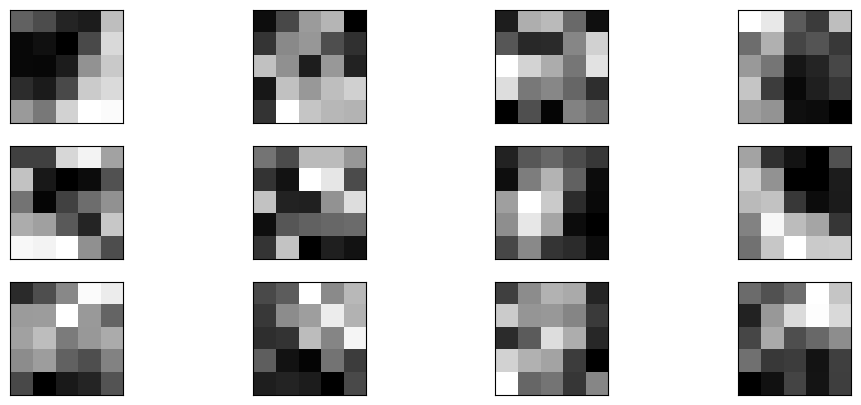

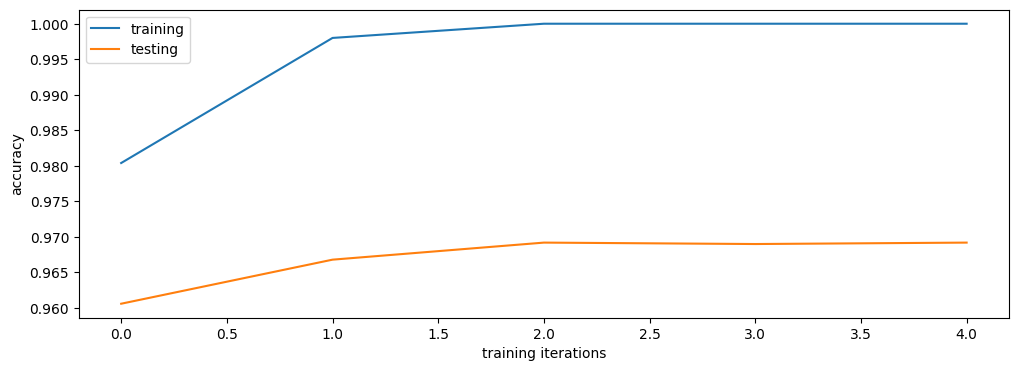

In [74]:
import torchvision
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=100, shuffle=True)


class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

network = Net5()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


for i in range(5):
    continue_training()




plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_8773/3803672201.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


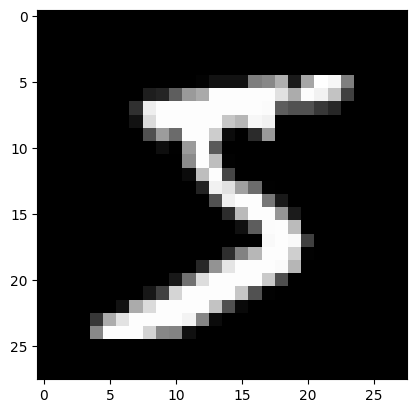

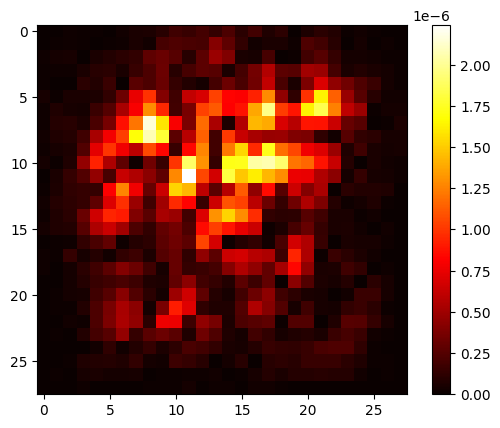

In [77]:
# Load a sample image from MNIST
image, label = train_loader.dataset[0]
image.requires_grad_();

print(image)
print(label)

# Step 3: Forward pass
output = network(image)

# Zero the existing gradients
network.zero_grad()

print(output.shape)

# Perform backpropagation
output[0, label].backward()  # Get the gradient for the correct class

# Step 4: Saliency map calculation
saliency, _ = torch.max(image.grad.data.abs(), dim=0)  # Take the maximum across color channels

# Visualize the saliency map
plt.imshow(image.detach().numpy().squeeze(), cmap='gray')  # Original Image
plt.figure()
plt.imshow(saliency.numpy().squeeze(), cmap='hot')  # Saliency map
plt.colorbar()
plt.show()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307885
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.239655
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.501789
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.834672
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.543373
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.329251
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.456186
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.283582
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.371879
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.283347


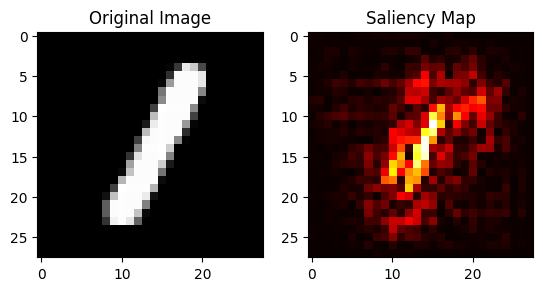

In [274]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST Data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

# Initialize the model, optimizer, and loss function
model = SimpleCNN()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

# Function to train the model
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

# Train the model briefly for demonstration purposes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
for epoch in range(1, 2):  # Training only for 1 epoch for simplicity
    train(model, device, train_loader, optimizer, epoch)

# Generating a saliency map for the first image in the test set
model.eval()
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
data.requires_grad_()

output = model(data)
output_idx = output.max(1, keepdim=True)[1][0].item()

output[0, output_idx].backward()
saliency, _ = torch.max(data.grad.data.abs(), dim=1)
saliency = saliency[0]  # saliency map for the first image

# Plot the results
fig, ax = plt.subplots(1, 2)
ax[0].imshow(data[0].cpu().detach().numpy().squeeze(), cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(saliency.cpu().numpy(), cmap='hot')
ax[1].set_title('Saliency Map')
plt.show()


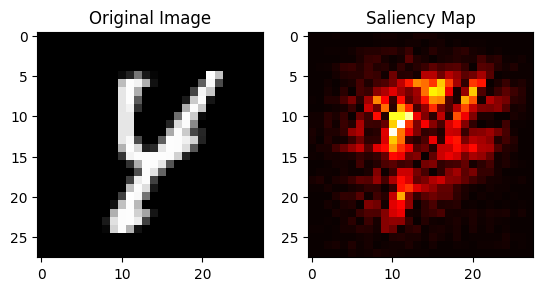

In [282]:

# Generating a saliency map for the first image in the test set
model.eval()
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
data.requires_grad_()

output = model(data)
output_idx = output.max(1, keepdim=True)[1][0].item()

output[0, output_idx].backward()
saliency, _ = torch.max(data.grad.data.abs(), dim=1)
saliency = saliency[0]  # saliency map for the first image

# Plot the results
fig, ax = plt.subplots(1, 2)
ax[0].imshow(data[0].cpu().detach().numpy().squeeze(), cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(saliency.cpu().numpy(), cmap='hot')
ax[1].set_title('Saliency Map')
plt.show()

In [283]:
original = data[0]

salience_map = saliency.cpu().numpy()

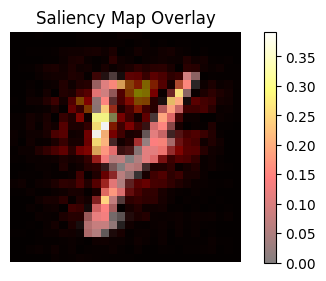

In [284]:
plt.figure(figsize=(6, 3))
plt.imshow(data[0].cpu().detach().numpy().squeeze(), cmap='gray')
plt.imshow(saliency.cpu().numpy(), cmap='hot', alpha=0.5)  # Overlay with transparency
plt.colorbar()
plt.title('Saliency Map Overlay')
plt.axis('off')
plt.show()

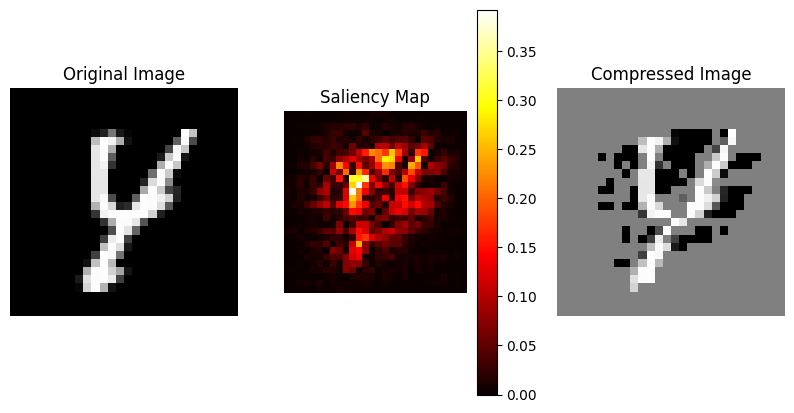

In [285]:
# Assuming 'data' is the original image tensor and 'saliency' is the saliency map tensor
# Set a threshold level for the saliency map
threshold = 0.06  # You can adjust this threshold based on your specific needs

# Create a mask where each pixel is True if the corresponding saliency map value is above the threshold
mask = saliency > threshold

# Apply the mask to the original image
# We use the mask to zero out pixels in the original image below the saliency threshold
compressed_image = data.clone()  # Make a copy of the original image to keep it unchanged
compressed_image[0, 0, ~mask] = 0  # Apply mask to the image, zeroing out less important pixels

# Now 'compressed_image' contains the original image data where less salient pixels have been zeroed out

# If you want to visualize the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(data[0].cpu().detach().squeeze(), cmap='gray', interpolation='none')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saliency.cpu().squeeze(), cmap='hot', interpolation='none')
plt.title("Saliency Map")
plt.colorbar()
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(compressed_image[0].cpu().detach().squeeze(), cmap='gray', interpolation='none')
plt.title("Compressed Image")
plt.axis('off')

plt.show()


In [286]:
output = model(compressed_image)

print(output[0])

output = model(data)

print(output[0])

tensor([-3.5442, -0.7582,  0.3115, -0.6334,  5.0608, -2.0444, -1.9785, -0.4319,
         2.8407,  0.4100], grad_fn=<SelectBackward0>)
tensor([-6.4507,  0.3873, -1.0229, -2.7674,  7.0425, -2.9836, -3.9026,  1.3182,
         4.2884,  2.8327], grad_fn=<SelectBackward0>)


162
0.2066326530612245
tensor([[[[ 0., -1.,  0.,  ...,  0.,  0.,  0.],
          [-1., -1., -1.,  ...,  0.,  0., -1.],
          [ 0., -1.,  0.,  ..., -1.,  0.,  0.],
          ...,
          [ 0., -1.,  0.,  ...,  0.,  0., -1.],
          [ 0., -1.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1.,

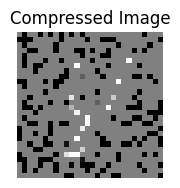

In [287]:
# now do the control code by deteing random pixels in the same proporttion

number_of_trues = mask.sum().item()
print(number_of_trues)

percent_true = number_of_trues / (mask.shape[0] * mask.shape[1])

print(percent_true)

random_values = torch.rand((28,28))
    
# Calculate the threshold value based on the desired percentage of True
threshold = 1 - percent_true 

# Create the mask by checking which values are above the threshold
random_mask = random_values > threshold

rand_compressed_image = data.clone()  # Make a copy of the original image to keep it unchanged
rand_compressed_image[0, 0, ~random_mask] = 0  # Apply mask to the image, zeroing out less important pixels

print(rand_compressed_image)

plt.subplot(1, 3, 3)
plt.imshow(rand_compressed_image[0].cpu().detach().squeeze(), cmap='gray', interpolation='none')
plt.title("Compressed Image")
plt.axis('off')

plt.show()


In [288]:
output = model(rand_compressed_image)

print(output[0])

tensor([-0.8864, -0.5503,  0.5360, -0.2904,  0.7538, -0.2146, -0.2596, -0.9950,
         1.7637, -0.2612], grad_fn=<SelectBackward0>)


In [298]:
original_confidences = []
salient_confidences = []
random_confidences = []
def test_salience_mask():
    # Generating a saliency map for the first image in the test set
    model.eval()
    data, target = next(iter(test_loader))
    data, target = data.to(device), target.to(device)
    data.requires_grad_()

    output = model(data)
    output_idx = output.max(1, keepdim=True)[1][0].item()

    output[0, output_idx].backward()
    saliency, _ = torch.max(data.grad.data.abs(), dim=1)
    saliency = saliency[0]  # saliency map for the first image

    # Assuming 'data' is the original image tensor and 'saliency' is the saliency map tensor
    # Set a threshold level for the saliency map
    threshold = 0.06  # You can adjust this threshold based on your specific needs

    # Create a mask where each pixel is True if the corresponding saliency map value is above the threshold
    mask = saliency > threshold

    # Apply the mask to the original image
    # We use the mask to zero out pixels in the original image below the saliency threshold
    compressed_image = data.clone()  # Make a copy of the original image to keep it unchanged
    compressed_image[0, 0, ~mask] = 0  # Apply mask to the image, zeroing out less important pixels


    number_of_trues = mask.sum().item()
    print(number_of_trues)

    percent_true = number_of_trues / (mask.shape[0] * mask.shape[1])

    print(percent_true)

    random_values = torch.rand((28,28))
        
    # Calculate the threshold value based on the desired percentage of True
    threshold = 1 - percent_true 

    # Create the mask by checking which values are above the threshold
    random_mask = random_values > threshold

    rand_compressed_image = data.clone()  # Make a copy of the original image to keep it unchanged
    rand_compressed_image[0, 0, ~random_mask] = 0  # Apply mask to the image, zeroing out less important pixels


    base_confidence = model(data)
    salient_confidence = model(compressed_image)
    random_confidence = model(rand_compressed_image)

    label = torch.argmax(base_confidence[0])

    original_confidences.append(base_confidence[0][label].item())
    salient_confidences.append(salient_confidence[0][label].item())
    random_confidences.append(random_confidence[0][label].item())
    

In [302]:
for i in range(100):
    test_salience_mask()

print(np.mean(original_confidences))
print(np.mean(salient_confidences))
print(np.mean(random_confidences))

150
0.1913265306122449
129
0.16454081632653061
140
0.17857142857142858
105
0.13392857142857142
159
0.20280612244897958
132
0.1683673469387755
92
0.11734693877551021
127
0.16198979591836735
153
0.1951530612244898
136
0.17346938775510204
122
0.1556122448979592
82
0.10459183673469388
155
0.19770408163265307
49
0.0625
114
0.14540816326530612
64
0.08163265306122448
56
0.07142857142857142
82
0.10459183673469388
117
0.14923469387755103
88
0.11224489795918367
145
0.18494897959183673
132
0.1683673469387755
173
0.22066326530612246
113
0.1441326530612245
50
0.06377551020408163
113
0.1441326530612245
115
0.14668367346938777
90
0.11479591836734694
120
0.15306122448979592
124
0.15816326530612246
112
0.14285714285714285
126
0.16071428571428573
51
0.06505102040816327
72
0.09183673469387756
75
0.09566326530612244
95
0.1211734693877551
89
0.11352040816326531
120
0.15306122448979592
101
0.1288265306122449
108
0.1377551020408163
146
0.18622448979591838
125
0.15943877551020408
65
0.08290816326530612
177
0.

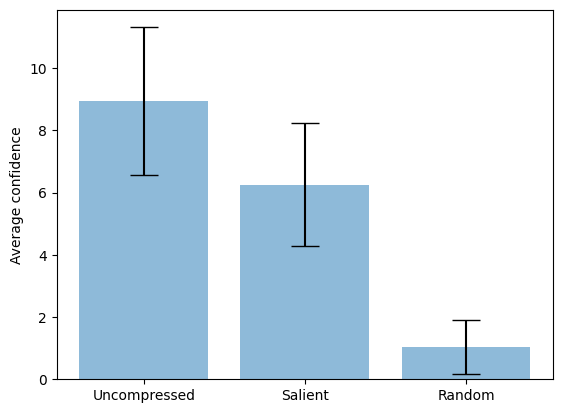

In [304]:
fig, ax = plt.subplots()
mu = [np.mean(original_confidences),
        np.mean(salient_confidences),
        np.mean(random_confidences)]
dev = [np.std(original_confidences),np.std(salient_confidences),np.std(random_confidences)]
ax.bar([1,2,3], mu, yerr=dev, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Average confidence')
ax.set_xticks([1,2,3], labels=['Uncompressed', 'Salient', 'Random'])

Files already downloaded and verified
tensor(1.5008, grad_fn=<NllLossBackward0>)
tensor(1.0058, grad_fn=<NllLossBackward0>)
tensor(0.6480, grad_fn=<NllLossBackward0>)
tensor(1.0934, grad_fn=<NllLossBackward0>)
tensor(0.4728, grad_fn=<NllLossBackward0>)
tensor(0.6077, grad_fn=<NllLossBackward0>)
tensor(0.5130, grad_fn=<NllLossBackward0>)
tensor(0.4759, grad_fn=<NllLossBackward0>)


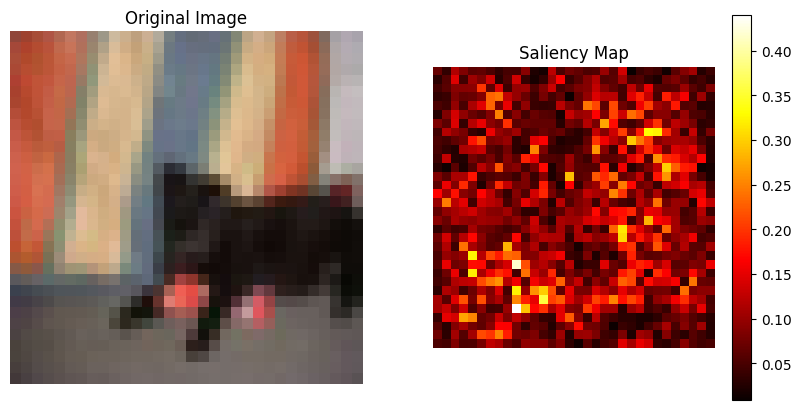

In [237]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define a simple CNN suitable for CIFAR-10
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super(CIFAR10CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.pool(self.conv1(x))))
        x = F.relu(self.bn2(self.pool(self.conv2(x))))
        x = F.relu(self.bn3(self.pool(self.conv3(x))))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(self.dropout(x)))
        x = self.fc2(x)
        return x

# Load CIFAR-10 Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

# Initialize the model, optimizer, and loss function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CIFAR10CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

# Function to train the model (simplified for demonstration)
def train(model, device, train_loader, optimizer, epochs=1):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            
            loss.backward()
            optimizer.step()
        print(loss)

# Train the model briefly for demonstration purposes
train(model, device, train_loader, optimizer, epochs=8)

# Generating a saliency map for the first image in the test set
model.eval()
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
data.requires_grad_()

output = model(data)
output_idx = output.max(1, keepdim=True)[1][0].item()

output[0, output_idx].backward()
saliency, _ = torch.max(data.grad.data.abs(), dim=1)
saliency = saliency[0]  # saliency map for the first image

# Plot the results with the saliency map overlaid on the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[0].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Un-normalize and permute to display
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency.cpu().numpy(), cmap='hot')
plt.title("Saliency Map")
plt.colorbar()
plt.axis('off')
plt.show()


In [248]:
# Train the model briefly for demonstration purposes
train(model, device, train_loader, optimizer, epochs=3)

tensor(0.6114, grad_fn=<NllLossBackward0>)
tensor(0.7168, grad_fn=<NllLossBackward0>)
tensor(0.1713, grad_fn=<NllLossBackward0>)


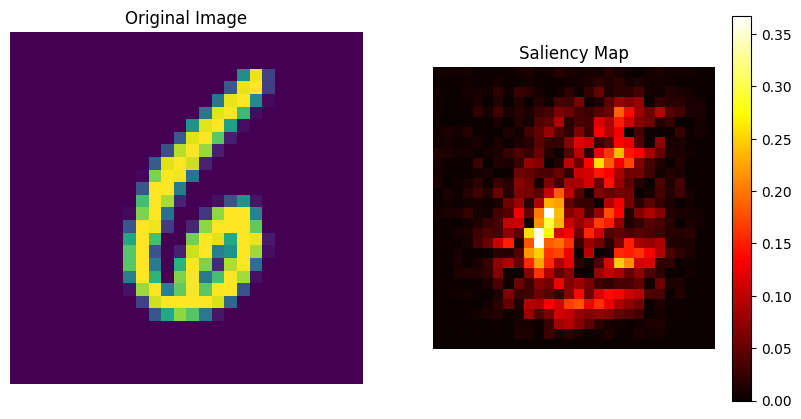

In [289]:
# Generating a saliency map for the first image in the test set
model.eval()
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
data.requires_grad_()

output = model(data)
output_idx = output.max(1, keepdim=True)[1][0].item()

output[0, output_idx].backward()
saliency, _ = torch.max(data.grad.data.abs(), dim=1)
saliency = saliency[0]  # saliency map for the first image

# Plot the results with the saliency map overlaid on the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data[0].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Un-normalize and permute to display
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency.cpu().numpy(), cmap='hot')
plt.title("Saliency Map")
plt.colorbar()
plt.axis('off')
plt.show()

In [265]:
output = model(data)

print(output[0])

tensor([ 6.9188, 10.3824, -2.2303, -2.7736, -3.0978, -4.4951, -5.0538, -3.7260,
        -0.0644,  5.9805], grad_fn=<SelectBackward0>)


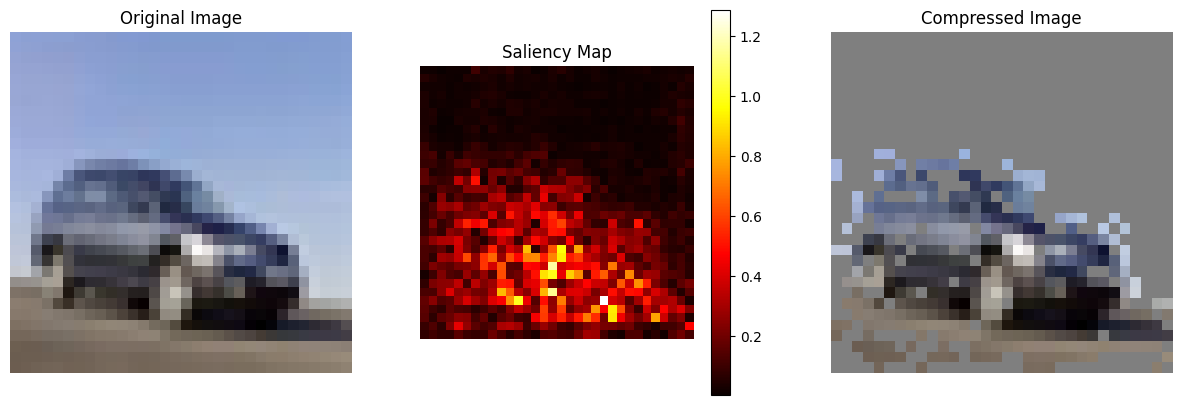

In [266]:
# Set a threshold for the saliency map
threshold = 0.15  # Adjust this threshold according to your needs

# Generate the mask where saliency values are greater than the threshold
mask = saliency > threshold

# Apply the mask to the original image tensor
# We clone the data to keep the original unchanged and apply the mask to zero out less important pixels
compressed_image = data.clone()
compressed_image[0, :, ~mask] = 0  # Zero out pixels in the batch where mask is False

# Visualize the original image, the saliency map, and the compressed image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(data[0].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Un-normalize and permute to display
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saliency.cpu().numpy(), cmap='hot')
plt.title("Saliency Map")
plt.colorbar()
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(compressed_image[0].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Un-normalize and permute to display
plt.title("Compressed Image")
plt.axis('off')

plt.show()


In [267]:
output = model(compressed_image)

print(output[0])

tensor([ 5.1839,  7.1451, -2.0810, -1.4526, -3.1333, -2.5966, -1.5974, -2.8085,
        -1.6816,  4.5933], grad_fn=<SelectBackward0>)


Number of True values in the saliency mask: 398
Percentage of True values: 0.388671875


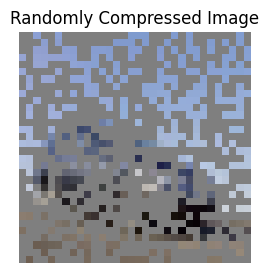

In [268]:
import torch
import matplotlib.pyplot as plt

# Assuming 'data' is your image batch from CIFAR-10 and 'mask' is the original saliency-based mask
number_of_trues = mask.sum().item()
print("Number of True values in the saliency mask:", number_of_trues)

# Calculate the percentage of True values
total_pixels = mask.numel()  # This accounts for all pixels in the mask
percent_true = number_of_trues / total_pixels
print("Percentage of True values:", percent_true)

# Generate a random mask for the CIFAR-10 image size
random_values = torch.rand((32, 32))  # Adjusted for CIFAR-10 image dimensions

# Calculate the threshold value based on the desired percentage of True
threshold = 1 - percent_true

# Create the mask by checking which values are above the threshold
random_mask = random_values > threshold

# Apply the random mask to all color channels of the image
rand_compressed_image = data.clone()  # Make a copy of the original image
for c in range(3):  # Apply the mask to each color channel
    rand_compressed_image[0, c, ~random_mask] = 0  # Zero out the pixels where the mask is False

# Visualization of the randomly compressed image
plt.figure(figsize=(6, 3))
plt.imshow(rand_compressed_image[0].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Normalize for display
plt.title("Randomly Compressed Image")
plt.axis('off')
plt.show()


In [269]:
output = model(rand_compressed_image)

print(output[0])

tensor([ 1.1353,  0.7056,  0.5172,  0.8755, -0.0971, -4.1909,  2.8528, -2.4310,
        -1.3199,  3.0266], grad_fn=<SelectBackward0>)
